Man and Umbrellas
==

Problem:
--

Imagine a man who walks every day between his home and his office.
Because of the ever-present threat of rain, he likes to keep an umbrella
at each location; that way, so goes his reasoning, if it is raining when
he is about to leave one location to walk to the other, he won’t get wet.
The only flaw in his grand plan is that if it isn’t raining he invariably
neglects to take an umbrella with him. If you think about this for about
five seconds, you should see that this can easily result in one location
eventually having both umbrellas and the other location having none.
If he then happens to be about to leave the no-umbrella location when
it is raining, well, he’s going to get wet!

We are thus led to the following pretty problem. If it is raining
with probability p at the time the man is about to start each of his
walks, then, on average, how many times will he remain dry before
experiencing his first soaking? To make the problem just a bit more
general, suppose we start the man off at home with $x > 0$ umbrellas,
and with $y > 0$ umbrellas at the office, where x and y are input
parameters to a Monte Carlo simulation. Use your simulation to
answer the above question for the two cases of $x=y=1$ and $x=y=2$,
as $p$ varies from $0.01$ to $0.99$. That covers the entire spectrum from a
very dry place (it rains, on average, once every $100$ walks) to a very wet
place (it doesn’t rain, on average, once every $100$ walks). Do you see
why we don’t need to run a simulation for either of the two extreme
values of $p=0$ (it never rains) and of $p=1$ (it always rains)? That is,
are the answers for these two special cases obvious to you by inspection?

Solution for $x=y=1$:
--

When $p=0$, it never rains, and therefore the man will never get wet. When $p=1$, it always rains, and therefore the man will always remember to take an umbrella with him; so again, the man will never get wet.

These extremes, as well as the intermediate cases, can be deduced from viewing the problem as a random walk on a graph with three vertices, $v_0$, $v_1$, and $v_2$, representing the states of having $0$, $1$, or $2$ umbrellas, respectively. Each vertex has two (length one) edges directed out of it, labelled $1$ or $0$, for raining or not raining. The extremes are represented by cycles containing the vertex $v_1$ in the graph from which a walk cannot escape when $p$ is either $0$ or $1$.

The first time the man is soaked is represented by the first instance a random walk encounters $v_0$ (no umbrellas) followed by $v_2$ (two umbrellas) along the edge labelled $1$ (raining); call this edge $E$.

Suppose that $\ell_i$, $i = 0,1,2,$ represents the average number of vertices that a random walk starting at the vertex $v_i$ encountered before $E$ is crossed. We observe the following:

$$
\begin{align}
\ell_0 & = (1-p)(1 + \ell_1) & \\
\ell_1 & = p(1 + \ell_1) + (1-p)(1 + \ell_2) & \\
\ell_2 & = p(1 + \ell_0) + (1-p)(1 + \ell_0) &
\end{align}
$$

This is a system of linear three equations with three unknowns, with solution:

$$
\begin{align}
\ell_0 & = \frac{1}{3} (3-p) & \\
\ell_1 & = \frac{-p^2 + 3p - 4)}{p(p-1)} \\
\ell_2 & = -\frac{(p-1)^2 + 2}{p(p-1)}
\end{align}
$$

Note that these values are not defined for $p$ equal to $0$ or $1$.

For example, if $p = 0.5$, then the solution to the problem is $\ell_1 = 11$.

This approach would result in a solution for $x = y = 2$ as well.

Simulator
--

We import packages.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

My code for a basic simulator; values for $x$ and $y$ are input as u_1, u_2.

In [19]:
def MC_sim(p,u_1,u_2,n,m):#p is probability, u_1+u_2 total umbrellas, n the number of iterations, m max attempted path
    N = n
    total = 0
    tot_umb = u_1 + u_2

    for i in range(n):
        umb = u_1
        j = 0
        while j < m and umb > -1:
            weather = np.random.binomial(1,p)
            if weather == 1 and umb == 0:
                umb = -1# man is soaked!
            else:
                umb = tot_umb - umb + weather# computes number of umbrellas at new location
                j += 1# adds to the length of the walk
        if umb > -1:
            N -=1# If pathlength exceeds m before soaking, then we don't count this path in the average.
        else:
            total +=j
    
    if N == 0:
        average = -1# Path length has exceeded N on every iteration -- could make N/n > bound.
    else: average = total/N
    return average       

We can test the simulation for $p = 0.5$; from our calculation above, we expect this to be close to $11$:

In [21]:
MC_sim(0.5,1,1,10000,10000)

10.9068

Now we test our simulation for intermediate values of $p$, for $x = y = 1$ and $x = y = 2$.

In [24]:
paths_1 = []# This will be a list of path lengths for x = y = 1 for different probabilities p
paths_2 = []# This will be a list of path lengths for x = y = 2 for different probabilities p

p = 0
while p < 0.99:
    p += 0.01
    paths_1.append(MC_sim(p,1,1,1000,10000))
    
p = 0
while p < 0.99:
    p += 0.01
    paths_2.append(MC_sim(p,2,2,1000,1000))

We create bars graphs from our simulation results:

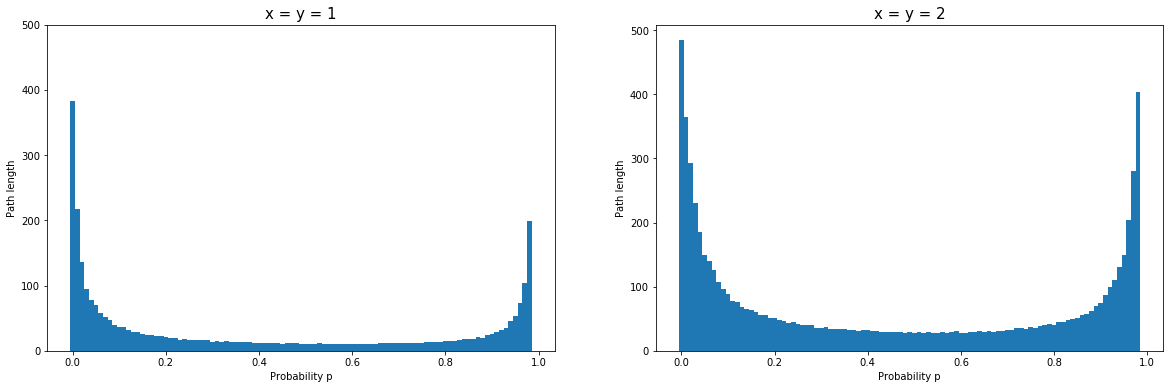

In [63]:
bars = []
t = 0

while t < 0.99:
    bars.append(t)
    t += 0.01

plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
plt.bar(bars, paths_1, width = 0.01)
plt.title('x = y = 1', fontsize=15)
plt.ylim((0,500))
plt.xlabel('Probability p')
plt.ylabel('Path length')

plt.subplot(1,2,2)
plt.bar(bars, paths_2, width = 0.01)
plt.title('x = y = 2', fontsize=15)
plt.xlabel('Probability p')
plt.ylabel('Path length')
plt.tight_layout

plt.show()